Прогнозирование акций Лукойл

In [2]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras import utils #Для to_categorical
import numpy as np #Numpy
from keras.optimizers import Adam #Оптимизатор
from keras.models import Sequential, Model #Два варианты моделей
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
import seaborn as sns
# Рисовать графики сразу же
%matplotlib inline

import os
print ("Ok")

Ok


In [3]:
#Загружаем датафрейм
frame = pd.read_csv('Gosloto_6x45_20200927.csv', header=0, sep=',')

In [10]:
# удвляем дату и тираж
frame = frame.drop(columns=['datetime', 'tiraz', 'jackpot'], axis=1).astype(float)

<AxesSubplot:>

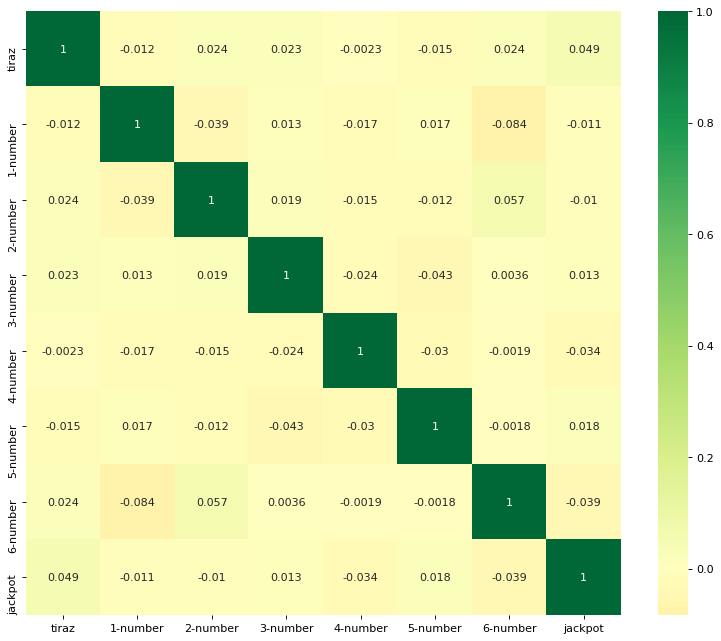

In [5]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(frame.corr(), xticklabels=frame.corr().columns, yticklabels=frame.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [6]:
frame.describe()

,tiraz,1-number,2-number,3-number,4-number,5-number,6-number,jackpot
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,4893.500000,23.130000,23.134000,23.168000,22.832000,23.857000,22.525000,1.544102e+08
std,288.819436,13.311961,12.988254,12.787545,13.265208,13.292752,12.701918,9.711166e+07
min,4394.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+07
25%,4643.750000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,6.454222e+07
50%,4893.500000,23.000000,23.000000,23.000000,23.000000,24.000000,22.000000,1.525433e+08
75%,5143.250000,35.000000,35.000000,34.000000,35.000000,36.000000,34.000000,2.348727e+08
max,5393.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,3.706598e+08


In [68]:
ser = ([])
df = pd.DataFrame ()
for idx,row in frame[:].iterrows():
    print (idx,row)
    ser.append(row)

0 1-number     3.0
2-number    22.0
3-number     8.0
4-number    45.0
5-number    36.0
6-number    12.0
Name: 0, dtype: float64
1 1-number    16.0
2-number     5.0
3-number     9.0
4-number    43.0
5-number    13.0
6-number    12.0
Name: 1, dtype: float64
2 1-number    41.0
2-number    22.0
3-number    20.0
4-number     5.0
5-number    32.0
6-number    11.0
Name: 2, dtype: float64
3 1-number    32.0
2-number    22.0
3-number    38.0
4-number     3.0
5-number     2.0
6-number    37.0
Name: 3, dtype: float64
4 1-number    14.0
2-number    41.0
3-number    22.0
4-number     8.0
5-number    29.0
6-number    25.0
Name: 4, dtype: float64
5 1-number    22.0
2-number    39.0
3-number    27.0
4-number     6.0
5-number    29.0
6-number    28.0
Name: 5, dtype: float64
6 1-number    37.0
2-number     7.0
3-number     9.0
4-number    27.0
5-number    41.0
6-number    31.0
Name: 6, dtype: float64
7 1-number    42.0
2-number    22.0
3-number    44.0
4-number    31.0
5-number    32.0
6-number    11.0


[1-number     3.0
 2-number    22.0
 3-number     8.0
 4-number    45.0
 5-number    36.0
 6-number    12.0
 Name: 0, dtype: float64,
 1-number    16.0
 2-number     5.0
 3-number     9.0
 4-number    43.0
 5-number    13.0
 6-number    12.0
 Name: 1, dtype: float64,
 1-number    41.0
 2-number    22.0
 3-number    20.0
 4-number     5.0
 5-number    32.0
 6-number    11.0
 Name: 2, dtype: float64,
 1-number    32.0
 2-number    22.0
 3-number    38.0
 4-number     3.0
 5-number     2.0
 6-number    37.0
 Name: 3, dtype: float64,
 1-number    14.0
 2-number    41.0
 3-number    22.0
 4-number     8.0
 5-number    29.0
 6-number    25.0
 Name: 4, dtype: float64,
 1-number    22.0
 2-number    39.0
 3-number    27.0
 4-number     6.0
 5-number    29.0
 6-number    28.0
 Name: 5, dtype: float64,
 1-number    37.0
 2-number     7.0
 3-number     9.0
 4-number    27.0
 5-number    41.0
 6-number    31.0
 Name: 6, dtype: float64,
 1-number    42.0
 2-number    22.0
 3-number    44.0
 4-numbe